In [177]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import re
import requests
import seaborn as sns

In [178]:
pd.set_option('max_colwidth', 400)

### Import data

In [179]:
df = pd.read_csv('se_lublin.csv')

In [180]:
df.columns

Index(['Unnamed: 0', 'publication_date', 'publication_month',
       'publication_day', 'author', 'title', 'url', 'koronawirus_in_text',
       'koronawirus_in_title', 'question_mark', 'exclamation_mark',
       'all_words', 'koronawirus_anywhere', 'koronawirus_anywhere_count'],
      dtype='object')

In [181]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(2)

,publication_date,publication_month,publication_day,author,title,url,koronawirus_in_text,koronawirus_in_title,question_mark,exclamation_mark,all_words,koronawirus_anywhere,koronawirus_anywhere_count
0,2020-04-15 10:42:00,2020-04,2020-04-15,marek targoński,Lubelskie: AŻ 25 NOWYCH ZAKAŻEŃ. Koronawirus atakuje z ogromną siłą! [NOWE DANE],https://www.se.pl/lublin/lubelskie-az-25-nowych-zakazen-koronawirus-atakuje-z-ogromna-sila-nowe-dane-aa-xMvU-hSfD-xgA8.html,13,1,0,2,160,14,1
1,2020-08-19 21:41:00,2020-08,2020-08-19,mariusz mucha,Tragedia pod Parczewem. Piotrek w SZALE zatłukł cegłą nie tego brata,https://lublin.se.pl/tragedia-pod-parczewem-zatlukl-cegla-nie-tego-brata-aa-pG2R-Mdb2-2su2.html,0,0,1,0,340,0,0


# Project

### First articles with covid in the title

In [116]:
covid_articles = df.sort_values(by=['koronawirus_in_title', 'publication_date'], ascending=[False, True])
covid_articles[['publication_date', 'author', 'title', 'url']].head(8)

,publication_date,author,title,url
1452,2020-01-29 15:07:00,mpgt,"Koronawirus na Lubelszczyźnie? Sześć osób trafiło na badania! [AKTUALIZACJA, AUDIO]",https://www.se.pl/lublin/koronawirus-na-lubelszczyznie-lecieli-samolotem-z-pasazerami-z-chin-trafili-na-badania-aa-u6Ye-EK9f-HCQa.html
820,2020-01-31 10:46:00,marek targoński,Koronawirus z Chin: Gdzie jest? Sprawdź swój region! Lubelskie jest bezpieczne? [MAPA],https://www.se.pl/lublin/koronawirus-z-chin-gdzie-jest-sprawdz-swoj-region-lubelskie-jest-bezpieczne-mapa-aa-GhkG-KYdd-SAR3.html
1438,2020-02-05 16:54:00,ac,Koronawirus w Lublinie? Mężczyzna zgłosił się z do kliniki chorób zakaźnych! [AKTUALIZACJA],https://www.se.pl/lublin/koronawirus-w-lublinie-mezczyzna-zglosil-sie-z-objawami-do-kliniki-chorob-zakaznych-aa-QMCk-3SQs-eVz3.html
1435,2020-02-08 22:25:00,marek targoński,KORONAWIRUS w Lublinie? Znamy wyniki badań! NOWE INFORMACJE [RELACJA],https://www.se.pl/lublin/koronawirus-w-lublinie-pacjent-trafil-do-szpitala-trwaja-badania-audio-aa-mgQE-Sn8h-sSd3.html
1411,2020-02-26 09:33:00,marek targoński,Koronawirus w Lubelskiem? Wrócili z Włoch – 27 osób pod lupą sanepidu. „Zwiększone ryzyko” [AKTUALIZACJA],https://www.se.pl/lublin/koronawirus-w-lubelskiem-wrocili-z-wloch-27-osob-pod-lupa-sanepidu-zwiekszone-ryzyko-aa-9VGu-q7k3-Bj45.html
1410,2020-02-26 13:31:00,marek targoński,Koronawirus w Lublinie? Uczelnia zawiesza rekrutację cudzoziemców. „Wszyscy się boimy”,https://www.se.pl/lublin/koronawirus-w-lublinie-uczelnia-zawiesza-rekrutacje-cudzoziemcow-wszyscy-sie-boimy-aa-CKyb-X5br-fqRb.html
763,2020-02-26 14:58:00,marek targoński,"Koronawirus w Lubelskiem? Dwie osoby w szpitalu! Trwają badania [AKTUALIZACJA, AUDIO]",https://www.se.pl/lublin/koronawirus-na-lubelszczyznie-dwie-osoby-w-szpitalu-trwaja-badania-aa-aWVz-FSnY-zPri.html
762,2020-02-27 07:42:00,marek targoński,Koronawirus. Gdzie zgłosić się z objawami w Lublinie? Oddziały zakaźne w Lubelskiem [ADRESY],https://www.se.pl/lublin/koronawirus-gdzie-zglosic-sie-z-objawami-w-lublinie-oddzialy-zakazne-w-lubelskiem-adresy-aa-HEUE-KYLF-y22f.html


### Number of articles with covid in the title

In [117]:
df.koronawirus_in_title.sum()

345

### Mean number of covid articles in the title

In [118]:
df.koronawirus_in_title.mean()

0.22893165228931653

### Number of articles with covid in the title each month

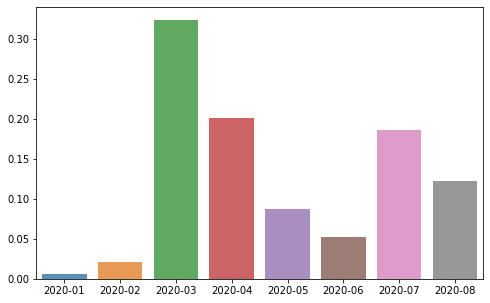

In [119]:
df_with_koronawirus_in_title = df.where(df["koronawirus_in_title"] > 0).dropna()
publication_month_with_koronawirus_in_title_count = df_with_koronawirus_in_title.publication_month.astype('category').value_counts(normalize=True)
plt.figure(figsize=(8, 5))
sns.barplot(publication_month_with_koronawirus_in_title_count.index, publication_month_with_koronawirus_in_title_count.values, alpha=0.8)
plt.show()

In [120]:
df_with_koronawirus_in_title.groupby('publication_month').count()

,publication_date,publication_day,author,title,url,koronawirus_in_text,koronawirus_in_title,question_mark,exclamation_mark,all_words,koronawirus_anywhere,koronawirus_anywhere_count
publication_month,,,,,,,,,,,,
2020-01,2,2,2,2,2,2,2,2,2,2,2,2
2020-02,7,7,7,7,7,7,7,7,7,7,7,7
2020-03,111,111,111,111,111,111,111,111,111,111,111,111
2020-04,69,69,69,69,69,69,69,69,69,69,69,69
2020-05,30,30,30,30,30,30,30,30,30,30,30,30
2020-06,18,18,18,18,18,18,18,18,18,18,18,18
2020-07,64,64,64,64,64,64,64,64,64,64,64,64
2020-08,42,42,42,42,42,42,42,42,42,42,42,42


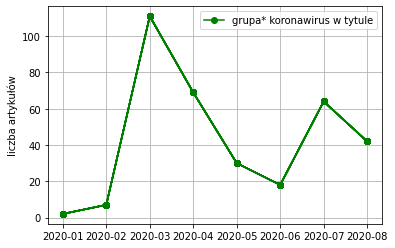

In [121]:
df_with_koronawirus_in_title = df.where(df["koronawirus_in_title"] > 0).dropna()
# plt.style.use('ggplot')
# plt.style.use('dark_background')
#plt.style.use('seaborn-whitegrid')
plt.plot(df_with_koronawirus_in_title.groupby('publication_month').count(),
         color='g',
        marker='o')
plt.ylabel("liczba artykułów")
plt.legend(["grupa* koronawirus w tytule"])
# plt.annotate(["2", (0, 8)], ["7", (1.2, 2)])
plt.grid()
plt.show()

### Number of articles with covid in the text

In [122]:
koronawirus_in_text_true = df['koronawirus_in_text'] > 0
df['koronawirus_in_text'][koronawirus_in_text_true].count()

555

In [123]:
koronawirus_in_text_true.mean()

0.36828135368281356

### Number of covid articles in the text each month

In [124]:
df_with_koronawirus_in_text = df.where(df["koronawirus_in_text"] > 0).dropna()
df_with_koronawirus_in_text.head(3)

,publication_date,publication_month,publication_day,author,title,url,koronawirus_in_text,koronawirus_in_title,question_mark,exclamation_mark,all_words,koronawirus_anywhere,koronawirus_anywhere_count
0,2020-04-15 10:42:00,2020-04,2020-04-15,marek targoński,Lubelskie: AŻ 25 NOWYCH ZAKAŻEŃ. Koronawirus atakuje z ogromną siłą! [NOWE DANE],https://www.se.pl/lublin/lubelskie-az-25-nowych-zakazen-koronawirus-atakuje-z-ogromna-sila-nowe-dane-aa-xMvU-hSfD-xgA8.html,13.0,1.0,0.0,2.0,160.0,14.0,1.0
4,2020-08-19 16:06:00,2020-08,2020-08-19,karolina januszek,Koniec zakazu handlu? Większość Polaków chce zmian,https://lublin.se.pl/koniec-zakazu-handlu-stanowcza-deklaracja-polakow-ak-JMnw-vRFC-xaa6.html,10.0,0.0,0.0,1.0,334.0,10.0,1.0
6,2020-08-19 14:07:00,2020-08,2020-08-19,km,"Koronawirus na polskich weselach: zimna wódeczka, wspólne tańce, gorące pocałunki. LISTA",https://lublin.se.pl/koronawirus-w-polsce-te-wesela-okazaly-sie-ogniskami-koronawirusa-lista-ak-U5fw-zJ35-Wqmq.html,8.0,1.0,2.0,0.0,143.0,9.0,1.0


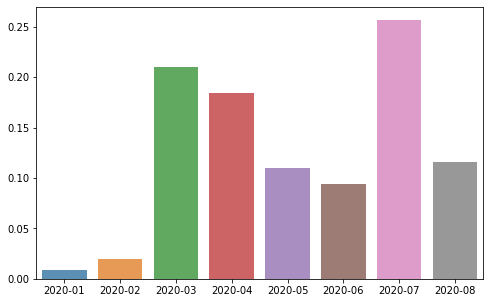

In [125]:
publication_month_with_koronawirus_in_text_count = df_with_koronawirus_in_text.publication_month.astype('category').value_counts(normalize=True)
plt.figure(figsize=(8, 5))
sns.barplot(publication_month_with_koronawirus_in_text_count.index, publication_month_with_koronawirus_in_text_count.values, alpha=0.8)
plt.show()

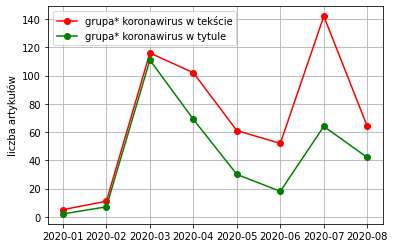

In [126]:
plt.plot(df_with_koronawirus_in_text[['koronawirus_in_text', 'publication_month']].groupby('publication_month').count(),
        color='r',
        marker='o')

plt.plot(df_with_koronawirus_in_title[['koronawirus_in_title', 'publication_month']].groupby('publication_month').count(),
        color='g',
        marker='o')

plt.ylabel("liczba artykułów")
plt.grid()
plt.legend(["grupa* koronawirus w tekście", "grupa* koronawirus w tytule"])
plt.show()

In [127]:
df_with_koronawirus_in_text.groupby('publication_month').count()

,publication_date,publication_day,author,title,url,koronawirus_in_text,koronawirus_in_title,question_mark,exclamation_mark,all_words,koronawirus_anywhere,koronawirus_anywhere_count
publication_month,,,,,,,,,,,,
2020-01,5,5,5,5,5,5,5,5,5,5,5,5
2020-02,11,11,11,11,11,11,11,11,11,11,11,11
2020-03,116,116,116,116,116,116,116,116,116,116,116,116
2020-04,102,102,102,102,102,102,102,102,102,102,102,102
2020-05,61,61,61,61,61,61,61,61,61,61,61,61
2020-06,52,52,52,52,52,52,52,52,52,52,52,52
2020-07,142,142,142,142,142,142,142,142,142,142,142,142
2020-08,64,64,64,64,64,64,64,64,64,64,64,64


### Articles from July with covid in the title / without covid in the text

In [128]:
title_false = df['koronawirus_in_title'] == 0
text_true = df['koronawirus_in_text'] > 0
publication_month_07 = df['publication_month'] == "2020-07"

df_title_false_and_text_true = df[title_false & text_true & publication_month_07]

df_title_false_and_text_true.sort_values(by='koronawirus_in_text', ascending=False)[:50]

,publication_date,publication_month,publication_day,author,title,url,koronawirus_in_text,koronawirus_in_title,question_mark,exclamation_mark,all_words,koronawirus_anywhere,koronawirus_anywhere_count
1089,2020-07-10 10:01:00,2020-07,2020-07-10,maal,Fundacja Poczty Polskiej pomaga nie tylko pocztowcom,https://lublin.se.pl/fundacja-poczty-polskiej-pomaga-nie-tylko-pocztowcom-ak-mhyB-eDys-5KSt.html,13,0,0,0,439,13,1
117,2020-07-28 17:28:00,2020-07,2020-07-28,karolina januszek,Zakaz handlu tymczasowo zniesiony? Jest projekt,https://lublin.se.pl/zakaz-handlu-tymczasowo-zniesiony-jest-projekt-ak-UDmc-xk46-WKyr.html,12,0,1,0,338,12,1
359,2020-07-01 07:42:00,2020-07,2020-07-01,bartłomiej ważny,"Startuje Słoneczny Wrotków nad Zalewem Zemborzyckim. Sprawdź, co się zmieniło!",https://lublin.se.pl/startuje-sloneczny-wrotkow-nad-zalewem-zemborzyckim-sprawdz-co-sie-zmienilo-ak-fyZF-StCT-ebme.html,11,0,1,3,825,11,1
268,2020-07-09 18:24:00,2020-07,2020-07-09,maal,Obowiązkowe mierzenie temperatury pracownikom w Polsce! Ministerstwo reaguje,https://lublin.se.pl/obowiazkowe-mierzenie-temperatury-pracownikom-w-polsce-ministerstwo-reaguje-ak-NVmS-RHLu-NcPj.html,11,0,0,1,199,11,1
148,2020-07-24 17:07:00,2020-07,2020-07-24,kaja,Żabka przekazała 3 mln złotych polskim szpitalom. Wszystko dzięki klientom sieci,https://lublin.se.pl/zabka-przekazala-3-mln-zlotych-polskim-szpitalom-wszystko-dzieki-klientom-sieci-ak-EUZA-ARLQ-7Z7i.html,10,0,0,5,458,10,1
166,2020-07-22 15:39:00,2020-07,2020-07-22,karolina januszek,Zmiany w zakazie handlu. Jest nowy pomysł,https://lublin.se.pl/zmiany-w-zakazie-handlu-jest-nowy-pomysl-ak-2SVz-XDkR-RuTM.html,6,0,0,0,258,6,1
329,2020-07-03 14:20:00,2020-07,2020-07-03,karolina januszek,Primark w Polsce. Co dalej z otwarciem sklepu w Warszawie?,https://lublin.se.pl/primark-w-polsce-co-dalej-z-otwarciem-sklepu-w-warszawie-ak-7vbs-ADkt-xaho.html,5,0,0,0,246,5,1
189,2020-07-20 13:30:00,2020-07,2020-07-20,karolina januszek,Koniec pracy zdalnej. Jak przygotować firmę na powrót pracowników?,https://lublin.se.pl/koniec-pracy-zdalnej-jak-przygotowac-firme-na-powrot-pracownikow-ak-ftj7-XGSi-pprp.html,5,0,0,0,492,5,1
171,2020-07-22 12:13:00,2020-07,2020-07-22,karolina januszek,Minister Finansów o deficycie. Padła gigantyczna kwota,https://lublin.se.pl/minister-finansow-o-deficycie-padla-gigantyczna-kwota-ak-BwaP-W8ob-8aQ8.html,5,0,1,2,314,5,1
1068,2020-07-14 12:50:00,2020-07,2020-07-14,bartłomiej ważny,"Nadwaga, cukrycza i inne schorzenia - sprawdź, co grozi Twojemu dziecku [AUDIO]",https://lublin.se.pl/nadwaga-cukrycza-i-inne-schorzenia-sprawdz-co-grozi-twojemu-dziecku-audio-ak-oiid-dbpd-kdXh.html,4,0,0,0,347,4,1


### Total number of articles in the text each month

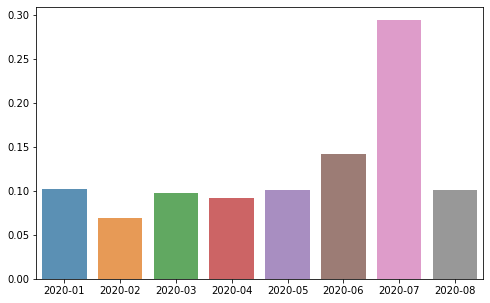

In [129]:
publication_month_count = df.publication_month.astype('category').value_counts(normalize=True)
plt.figure(figsize=(8, 5))
sns.barplot(publication_month_count.index, publication_month_count.values, alpha=0.8)
plt.show()

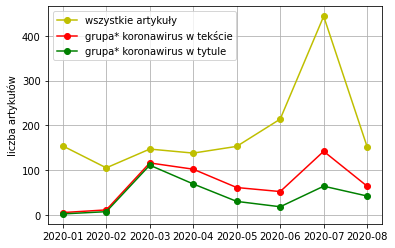

In [130]:
df_with_koronawirus_in_title = df.where(df["koronawirus_in_title"] > 0).dropna()

df_with_koronawirus_in_text = df.where(df["koronawirus_in_text"] > 0).dropna()

plt.plot(df[['koronawirus_in_text', 'publication_month']].groupby('publication_month').count(),
        color='y',
        marker='o')

plt.plot(df_with_koronawirus_in_text[['koronawirus_in_text', 'publication_month']].groupby('publication_month').count(),
        color='r',
        marker='o')

plt.plot(df_with_koronawirus_in_title[['koronawirus_in_title', 'publication_month']].groupby('publication_month').count(),
        color='g',
        marker='o')

plt.ylabel("liczba artykułów")
plt.grid()
plt.legend(["wszystkie artykuły", "grupa* koronawirus w tekście", "grupa* koronawirus w tytule"])
plt.show()

In [131]:
df[['koronawirus_in_text', 'publication_month']].groupby('publication_month').count()

,koronawirus_in_text
publication_month,
2020-01,154
2020-02,105
2020-03,147
2020-04,138
2020-05,153
2020-06,214
2020-07,444
2020-08,152


### Total number of articles

In [132]:
df.shape[0]

1507

### Days with a record number of articles

In [133]:
df.publication_day.value_counts().head(3)

2020-06-29    28
2020-07-08    26
2020-07-01    25
Name: publication_day, dtype: int64

### Covid article count per 100 articles

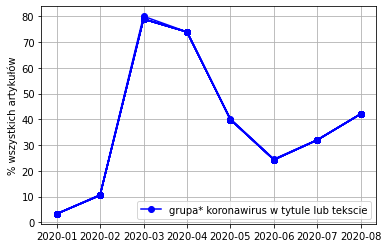

In [134]:

df_with_koronawirus_anywhere = df.where(df["koronawirus_anywhere"] > 0).dropna()

plt.plot((df_with_koronawirus_anywhere.groupby('publication_month').count() / df.groupby('publication_month').count()) * 100,
        color="b",
        marker='o')
plt.ylabel("% wszystkich artykułów")
plt.grid()
plt.legend(["grupa* koronawirus w tytule lub tekscie"])

In [135]:
df_with_koronawirus_anywhere = df.where(df["koronawirus_anywhere"] > 0).dropna()
wskaznik = df_with_koronawirus_anywhere.groupby('publication_month').count() / df.groupby('publication_month').count() * 100
wskaznik["publication_date"]

publication_month
2020-01     3.246753
2020-02    10.476190
2020-03    78.911565
2020-04    73.913043
2020-05    39.869281
2020-06    24.299065
2020-07    31.981982
2020-08    42.105263
Name: publication_date, dtype: float64

### The total number of covid words

In [136]:
df.koronawirus_in_text.sum()

6576

### Mean covid word count per article

In [137]:
koronawirus_in_text_true = df['koronawirus_in_text'] > 0
df['koronawirus_anywhere'][koronawirus_in_text_true].mean()

12.47027027027027

### Articles with the highest number of words in the covid group

In [138]:
# df.loc[df.koronawirus_in_text.idxmax()]

# df['koronawirus_in_text_rank'] = df['koronawirus_in_text'].rank(ascending=False)
# df.sort_values(by='koronawirus_in_text', ascending=False).head(15)

# df.sort_values(by='koronawirus_in_text', ascending=False)[:5]

df.nlargest(n=5, columns='koronawirus_in_text')

,publication_date,publication_month,publication_day,author,title,url,koronawirus_in_text,koronawirus_in_title,question_mark,exclamation_mark,all_words,koronawirus_anywhere,koronawirus_anywhere_count
1328,2020-04-16 22:42:00,2020-04,2020-04-16,paweł tabędzki / marek targoński / sylwia sitka-czerniak / konrad marzec,Przełom w walce z koronawirusem?! ARCYWAŻNE zmiany ogłoszone przez rząd. Koronawirus w Polsce [ZAPIS RELACJI NA ŻYWO],https://www.se.pl/lublin/liczba-zgonow-i-zakazonych-rosnie-najnowsze-informacje-oraz-statystyki-koronawirus-w-polsce-relacja-na-zywo-aa-arVq-4nsQ-phQ6.html,525,1,99,123,11153,526,1
651,2020-04-07 07:00:00,2020-04,2020-04-07,"magdalena jaśkiewicz-stawowczyk, marek targoński",Szokujący bilans koronawirusa w Polsce. Ważne słowa prezydenta Dudy. Groza w UK [ZAPIS RELACJI NA ŻYWO],https://www.se.pl/lublin/koronawirus-w-polsce-dzis-niedziela-palmowa-pierwsza-taka-w-historii-kosciola-relacja-na-zywo-aa-Hp4w-RQKA-CX2T.html,477,1,47,66,11170,478,1
750,2020-03-04 22:25:00,2020-03,2020-03-04,marek targoński,Koronawirus w Polsce! Oto konsekwencje: wzrost cen i wysoki popyt [ZAPIS RELACJI NA ŻYWO],https://www.se.pl/lublin/koronawirus-w-polsce-tytul-relacja-na-zywo-aa-jzM9-R6pH-GAfM.html,338,1,75,74,7144,339,1
713,2020-03-19 09:22:00,2020-03,2020-03-19,marek targoński,Koronawirus Lubelskie: COVID-19 na Lubelszczyźnie. Kto i gdzie choruje? Kim są pacjenci?,https://www.se.pl/lublin/koronawirus-lubelskie-covid-19-na-lubelszczyznie-kto-i-gdzie-choruje-kim-sa-pacjenci-aa-F4Hk-fcQg-hXY5.html,51,1,11,9,653,52,1
683,2020-03-27 10:14:00,2020-03,2020-03-27,NaN,Gdzie jest koronawisus w Polsce i Europie? Mapa zasięgu epidemii [MAPA KORONAWIRUSA],https://www.se.pl/lublin/koronawirus-w-polsce-gdzie-jest-wirus-z-chin-koronawirus-mapa-aa-dSBK-o5RJ-2eA4.html,31,1,13,10,449,32,1


### Total covid words each month

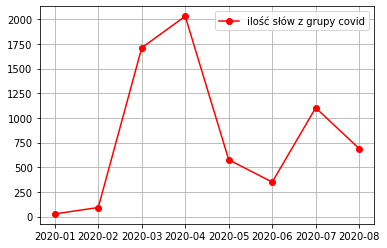

In [139]:
df_with_koronawirus_in_text = df[["koronawirus_in_text", 'publication_month']].where(df["koronawirus_in_text"] > 0).dropna()
plt.plot(
    df_with_koronawirus_in_text.groupby('publication_month').sum(),
    color="r",
    marker='o',
    label='ilość słów z grupy covid'
)
plt.grid()
plt.legend()

In [140]:
df_with_koronawirus_in_text.groupby('publication_month').sum()

,koronawirus_in_text
publication_month,
2020-01,27.0
2020-02,92.0
2020-03,1711.0
2020-04,2030.0
2020-05,576.0
2020-06,349.0
2020-07,1102.0
2020-08,689.0


### Total covid words each month without top 3

In [141]:
df_with_koronawirus_in_text_without_top3 = df_with_koronawirus_in_text['koronawirus_in_text'] = df_with_koronawirus_in_text['koronawirus_in_text'].replace([df_with_koronawirus_in_text.nlargest(n=3, columns='koronawirus_in_text')],
        df_with_koronawirus_in_text['koronawirus_in_text'].mean().astype(int).round())

In [142]:
df_with_koronawirus_in_text_without_top3.head(1)

0    13.0
Name: koronawirus_in_text, dtype: float64

In [143]:
df_with_koronawirus_in_text_without_top3.max()

51.0

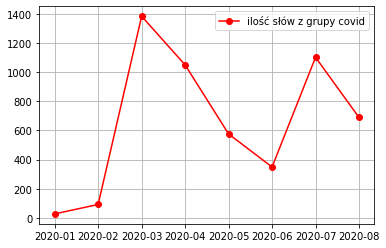

In [144]:
plt.plot(
    df_with_koronawirus_in_text.groupby('publication_month').sum(),
    color="r",
    marker='o',
    label='ilość słów z grupy covid'
)
plt.grid()
plt.legend()

### Covid article without top 3 count per 1000 articles

In [145]:
df_with_koronawirus_in_text_sum = df_with_koronawirus_in_text.groupby('publication_month').sum()

In [146]:
all_words_sum = df[['all_words', 'publication_month']].groupby('publication_month').sum()

In [147]:
article_with_covid_count_1000_articles = df_with_koronawirus_in_text_sum["koronawirus_in_text"] / all_words_sum["all_words"] * 1000
article_with_covid_count_1000_articles

publication_month
2020-01     0.779468
2020-02     4.196506
2020-03    32.777567
2020-04    19.378414
2020-05    15.137181
2020-06     5.637033
2020-07     9.505408
2020-08    17.041379
dtype: float64

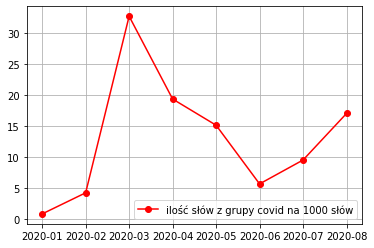

In [148]:
plt.plot(article_with_covid_count_1000_articles,
    color="r",
    marker='o',
    label='ilość słów z grupy covid na 1000 słów'
)
plt.grid()
plt.legend()

### The author of the largest number of articles with the word from the covid group in the title

In [149]:
df_with_koronawirus_in_title = df.where(df["koronawirus_in_title"] > 0).dropna()
df_with_koronawirus_in_title['author'].value_counts()[:1]

marek targoński    213
Name: author, dtype: int64

### The author of the largest number of articles with the word from the covid group in the text

In [172]:
df_with_koronawirus_in_text = df.where(df["koronawirus_in_text"] > 0).dropna()
df_with_koronawirus_in_text['author'].value_counts()[:1]


marek targoński    279
Name: author, dtype: int64

In [173]:
df.query('author == "marek targoński"').groupby('publication_month').sum()

,koronawirus_in_text,koronawirus_in_title,question_mark,exclamation_mark,all_words,koronawirus_anywhere,koronawirus_anywhere_count
publication_month,,,,,,,
2020-01,7,1,92,104,12664,8,1
2020-02,87,6,86,140,16818,93,10
2020-03,1324,73,239,242,29810,1397,76
2020-04,824,47,94,132,16624,871,63
2020-05,447,19,140,178,20887,466,39
2020-06,219,12,172,286,30773,231,23
2020-07,628,28,138,105,23284,656,39
2020-08,523,27,111,68,16075,550,28


In [174]:
#plt.plot(df.query('author == "marek targoński"').groupby('publication_month').sum())

### The author of the largest number of articles with the word from the covid group in the title

In [153]:
mt = df[['koronawirus_anywhere', 'publication_month']][df['author'].isin(['marek targoński'])]
mt['koronawirus_anywhere'].sum()

4272

### The author of the largest number of articles with the word from the covid - total covid words each month

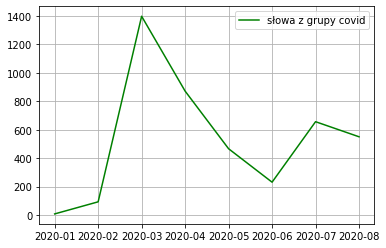

In [154]:
plt.plot(mt.groupby('publication_month').sum(),
        color="g")
plt.grid()
plt.legend(["słowa z grupy covid"])

### The author of the largest number of articles with the word from the covid - total covid articles

In [158]:
mt = df[['koronawirus_anywhere_count', 'publication_month']][df['author'].isin(['marek targoński'])]
mt['koronawirus_anywhere_count'].sum()

279

### The author of the largest number of articles with the word from the covid - total covid articles each month

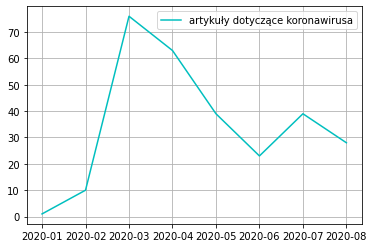

In [175]:
plt.plot(mt.groupby('publication_month').sum(),
        color="c")
plt.grid()
plt.legend(["artykuły dotyczące koronawirusa"])

### The total number of words in all articles

In [160]:
df[['all_words']].sum()

all_words    409299
dtype: int64

### The article with the most words

In [167]:
df[['publication_day', 'title', 'all_words']].nlargest(n=5, columns='all_words')

,publication_day,title,all_words
651,2020-04-07,Szokujący bilans koronawirusa w Polsce. Ważne słowa prezydenta Dudy. Groza w UK [ZAPIS RELACJI NA ŻYWO],11170
1328,2020-04-16,Przełom w walce z koronawirusem?! ARCYWAŻNE zmiany ogłoszone przez rząd. Koronawirus w Polsce [ZAPIS RELACJI NA ŻYWO],11153
750,2020-03-04,Koronawirus w Polsce! Oto konsekwencje: wzrost cen i wysoki popyt [ZAPIS RELACJI NA ŻYWO],7144
1168,2020-06-29,Lubelskie: Księża zmienią parafie! Decyzje personalne i nominacje w archidiecezji [LISTA],2716
1193,2020-06-23,BURZE nad Polską. OGROMNE straty i zniszczenia. Gdzie jest burza? [RELACJA NA ŻYWO],1829


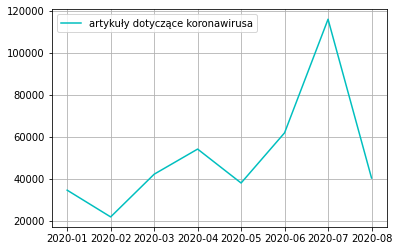

In [161]:
plt.plot(df[['all_words', 'publication_month']].groupby('publication_month').sum(),
        color="c")
plt.grid()
plt.legend(["artykuły dotyczące koronawirusa"])

### Question mark and exclamation mark

In [162]:
df[['question_mark']].sum()

question_mark    1939
dtype: int64

In [163]:
df[['question_mark', 'publication_month']].groupby('publication_month').max()

,question_mark
publication_month,
2020-01,10
2020-02,6
2020-03,75
2020-04,99
2020-05,7
2020-06,14
2020-07,12
2020-08,11


In [164]:
df[['exclamation_mark']].sum()

exclamation_mark    2193
dtype: int64

In [165]:
df[['exclamation_mark', 'publication_month']].groupby('publication_month').sum()

,exclamation_mark
publication_month,
2020-01,164
2020-02,169
2020-03,282
2020-04,399
2020-05,258
2020-06,394
2020-07,380
2020-08,147


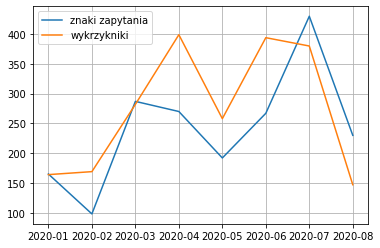

In [166]:
plt.plot(df[['question_mark', 'publication_month']].groupby('publication_month').sum())

plt.plot(df[['exclamation_mark', 'publication_month']].groupby('publication_month').sum())
plt.grid()
plt.legend(["znaki zapytania", "wykrzykniki"])

In [168]:
df[['publication_day', 'title', 'question_mark']].nlargest(n=5, columns='question_mark')

,publication_day,title,question_mark
1328,2020-04-16,Przełom w walce z koronawirusem?! ARCYWAŻNE zmiany ogłoszone przez rząd. Koronawirus w Polsce [ZAPIS RELACJI NA ŻYWO],99
750,2020-03-04,Koronawirus w Polsce! Oto konsekwencje: wzrost cen i wysoki popyt [ZAPIS RELACJI NA ŻYWO],75
651,2020-04-07,Szokujący bilans koronawirusa w Polsce. Ważne słowa prezydenta Dudy. Groza w UK [ZAPIS RELACJI NA ŻYWO],47
411,2020-06-24,"Co robić z dzieckiem na wakacjach, kiedy pada? [POMYSŁY, WAKACJE 2020]",14
683,2020-03-27,Gdzie jest koronawisus w Polsce i Europie? Mapa zasięgu epidemii [MAPA KORONAWIRUSA],13


In [169]:
df[['publication_day', 'title', 'exclamation_mark']].nlargest(n=5, columns='exclamation_mark')

,publication_day,title,exclamation_mark
1328,2020-04-16,Przełom w walce z koronawirusem?! ARCYWAŻNE zmiany ogłoszone przez rząd. Koronawirus w Polsce [ZAPIS RELACJI NA ŻYWO],123
750,2020-03-04,Koronawirus w Polsce! Oto konsekwencje: wzrost cen i wysoki popyt [ZAPIS RELACJI NA ŻYWO],74
651,2020-04-07,Szokujący bilans koronawirusa w Polsce. Ważne słowa prezydenta Dudy. Groza w UK [ZAPIS RELACJI NA ŻYWO],66
411,2020-06-24,"Co robić z dzieckiem na wakacjach, kiedy pada? [POMYSŁY, WAKACJE 2020]",14
87,2020-08-02,"Weekend na Lubelszczyźnie. Sprawdźcie TOP 10 miejsc, które musicie odwiedzić! [ZESTAWIENIE]",10


In [170]:
df[koronawirus_in_text_true].max()

publication_date                                                                         2020-08-19 16:20:00
publication_month                                                                                    2020-08
publication_day                                                                                   2020-08-19
title                            „Pol’and’Rock” Music w drogeriach Sephora! WOŚP wypuściło wyjątkowe perfumy
url                           https://www.se.pl/lublin/zwierzeta-z-zoo-prosza-o-pomoc-aa-tECy-38rb-PCaM.html
koronawirus_in_text                                                                                      525
koronawirus_in_title                                                                                       1
question_mark                                                                                             99
exclamation_mark                                                                                         123
all_words          

In [171]:
df.head()

,publication_date,publication_month,publication_day,author,title,url,koronawirus_in_text,koronawirus_in_title,question_mark,exclamation_mark,all_words,koronawirus_anywhere,koronawirus_anywhere_count
0,2020-04-15 10:42:00,2020-04,2020-04-15,marek targoński,Lubelskie: AŻ 25 NOWYCH ZAKAŻEŃ. Koronawirus atakuje z ogromną siłą! [NOWE DANE],https://www.se.pl/lublin/lubelskie-az-25-nowych-zakazen-koronawirus-atakuje-z-ogromna-sila-nowe-dane-aa-xMvU-hSfD-xgA8.html,13,1,0,2,160,14,1
1,2020-08-19 21:41:00,2020-08,2020-08-19,mariusz mucha,Tragedia pod Parczewem. Piotrek w SZALE zatłukł cegłą nie tego brata,https://lublin.se.pl/tragedia-pod-parczewem-zatlukl-cegla-nie-tego-brata-aa-pG2R-Mdb2-2su2.html,0,0,1,0,340,0,0
2,2020-08-19 19:31:00,2020-08,2020-08-19,karolina januszek,"Wygraj 200 złotych od Biedronki. Zobacz, jak to zrobić",https://lublin.se.pl/wygraj-200-zlotych-od-biedronki-zobacz-jak-to-zrobic-ak-XEXJ-32sC-qWAi.html,0,0,0,1,349,0,0
3,2020-08-19 16:31:00,2020-08,2020-08-19,marek targoński,"Lubelskie: Gdzie jest burza w Lublinie lub okolicy? Burze Lublin: ostrzeżenia, mapy [RADAR BURZ]",https://lublin.se.pl/gdzie-jest-burza-w-lublinie-lub-okolicy-sprawdz-ostrzezenia-o-burzach-aa-kPJu-EuXq-voUh.html,0,0,4,4,293,0,0
4,2020-08-19 16:06:00,2020-08,2020-08-19,karolina januszek,Koniec zakazu handlu? Większość Polaków chce zmian,https://lublin.se.pl/koniec-zakazu-handlu-stanowcza-deklaracja-polakow-ak-JMnw-vRFC-xaa6.html,10,0,0,1,334,10,1
